## Load, clean, and explore the datasets provided (IHDP and JOBS),

In [1]:
import pandas as pd

In [2]:
job=pd.read_csv("https://raw.githubusercontent.com/dmachlanski/CE888_2022/main/project/data/jobs.csv",on_bad_lines='skip')

In [3]:
job.head(7)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,t,y,e
0,-0.614282,1.464727,0.0,0.0,1.0,0.0,2.393250,2.746196,-0.653311,-0.656913,1.627531,2.462337,2.937244,0.0,0.0,2.843909,0.0,0.0,1.0,0.0
1,-0.802463,0.101835,0.0,0.0,1.0,0.0,0.109885,0.498271,-0.785284,-0.743407,-0.022502,-0.177193,0.082537,0.0,0.0,0.038422,0.0,0.0,1.0,0.0
2,-0.896553,-0.238888,1.0,0.0,1.0,1.0,-0.085212,-0.148097,-0.847312,-0.781606,-0.361348,-0.286221,-0.303615,0.0,0.0,-0.191304,0.0,0.0,1.0,0.0
3,-0.896553,-0.238888,0.0,0.0,0.0,1.0,0.405581,0.325594,-0.847312,-0.781606,-0.361348,0.023020,-0.039630,0.0,0.0,0.173108,0.0,0.0,1.0,1.0
4,0.138440,-1.601779,1.0,0.0,1.0,1.0,-0.722531,-0.212734,-0.019840,-0.156019,-1.422084,-0.514563,-0.331552,0.0,0.0,-0.779227,0.0,0.0,1.0,0.0
5,0.138440,0.442558,0.0,0.0,1.0,0.0,2.162023,1.913100,-0.019840,-0.156019,0.345809,2.080718,1.605392,0.0,0.0,1.924029,0.0,0.0,1.0,0.0
6,-0.708372,-0.238888,1.0,0.0,1.0,1.0,-1.147411,-1.110467,-0.720617,-0.701889,-0.361348,-0.558057,-0.518815,1.0,1.0,-0.979981,0.0,0.0,1.0,1.0


In [4]:
job.isnull().sum()

x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
x12    0
x13    0
x14    0
x15    0
x16    0
x17    0
t      0
y      0
e      0
dtype: int64

In [5]:
job.describe().T

,count,mean,std,min,25%,50%,75%,max
x1,3212.0,2.382901e-16,1.000000,-1.461095,-0.802463,-0.332011,0.797073,2.114337
x2,3212.0,-3.820971e-16,1.000000,-3.986840,-0.579611,0.101835,0.442558,1.805449
x3,3212.0,3.742217e-01,0.483997,0.000000,0.000000,0.000000,1.000000,1.000000
x4,3212.0,4.887920e-02,0.215649,0.000000,0.000000,0.000000,0.000000,1.000000
x5,3212.0,7.079701e-01,0.454767,0.000000,0.000000,1.000000,1.000000,1.000000
x6,3212.0,4.118929e-01,0.492253,0.000000,0.000000,0.000000,1.000000,1.000000
x7,3212.0,-1.200783e-16,1.000000,-1.147411,-0.892339,-0.085212,0.550661,8.751987
x8,3212.0,4.956600e-17,1.000000,-1.110467,-0.913914,-0.083460,0.562908,10.165068
x9,3212.0,-6.083414e-18,1.000000,-1.164047,-0.785284,-0.435556,0.673018,2.446737
x10,3212.0,1.757408e-14,1.000000,-0.948832,-0.743407,-0.499853,0.526738,2.773336


In [6]:
import plotly.express as px
test = pd.DataFrame(job['y'].value_counts(normalize=False))
test = test.reset_index()
test.columns = ['Indicated Job Training','count']
test.machine_status = test['Indicated Job Training'].astype(str)
fig = px.bar(test, x='Indicated Job Training', y='count',title= "Status of the Indicated Job Training before using SMOTE")
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """


x1, Score: 0.04187
x2, Score: 0.03825
x3, Score: 0.02168
x4, Score: 0.00928
x5, Score: 0.02767
x6, Score: 0.00869
x7, Score: 0.04378
x8, Score: 0.40144
x9, Score: 0.06063
x10, Score: 0.05007
x11, Score: 0.06681
x12, Score: 0.03739
x13, Score: 0.09120
x14, Score: 0.00529
x15, Score: 0.00000
x16, Score: 0.09214
x17, Score: 0.00380


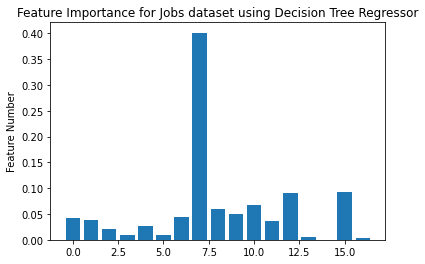

In [8]:
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot
# define dataset
X, y = job[job.columns[:17]],job['y']
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
rus.fit(X, y)
X, y = rus.fit_resample(X, y)
# define the model
model = DecisionTreeRegressor()
model.fit(X, y)
importance = model.feature_importances_
for i,v in enumerate(importance):
	print('x%0d, Score: %.5f' % (i+1,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.title("Feature Importance for Jobs dataset using Decision Tree Regressor")
pyplot.ylabel("Feature Score")
pyplot.ylabel("Feature Number")
pyplot.show()

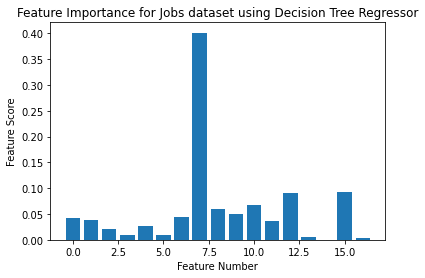

In [10]:
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.title("Feature Importance for Jobs dataset using Decision Tree Regressor")
pyplot.ylabel("Feature Score")
pyplot.xlabel("Feature Number")
pyplot.show()

In [ ]:
Features_Importance=pd.DataFrame([job.columns[:17],importance]).T
Features_Importance.columns=['Feature Name','Score']
Features_Importance.sort_values("Score",ascending=False)

,Feature Name,Score
7,x8,0.389134
15,x16,0.106586
12,x13,0.094348
0,x1,0.069559
10,x11,0.05172
9,x10,0.050543
6,x7,0.048346
1,x2,0.047524
11,x12,0.037811
8,x9,0.036249
